#  Experiment - 5: to demonstrating the working of decision tree based CART algorithm. Build the decision tree and classify a new sample using suitable dataset. Compare the performance with that of ID3, C4.5, and CART in terms of accuracy, recall, precision and sensitivity.   
  
  
Now the CART algorithm is the algorithm in decision tree using `gini index` to determine the purity of attributes and decide the best suitable choice for the root node at a particular level of height.   
Let's take the breast cancer dataset *(Since it contains only numerical values and binary output it will be easy to work on)* and apply CART algo using sci-kit learn library

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
from sklearn.datasets import load_breast_cancer

d = load_breast_cancer()
df = pd.DataFrame(d.data, columns=d.feature_names)
y = d.target
y = ["NO" if i == 0 else "YES" for i in y ]
df['Decision'] = y

# looking at dataset description
df.describe()
# note describe doesn't show for categorical data !!

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [3]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Decision
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NO
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NO
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NO
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NO
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NO
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NO
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NO
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NO
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NO
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NO


In [4]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [5]:
input_val = df[df.columns[0:len(df.columns)-1]].values
output_val = df[df.columns[-1]].values

# dividing the dataset into test and train:
(X_train, X_test, Y_train, Y_test) = train_test_split(input_val, output_val, train_size=0.75, random_state=1)
print("training set length-",len(X_train))#,len(Y_train))
print("testing set length-",len(X_test))

training set length- 426
testing set length- 143


In [31]:
# making the CART algo :
decison_cancer_CART = DecisionTreeClassifier(criterion = "gini") # specifying CART by using gini index for impurity check
decison_cancer_CART.fit(X_train, Y_train)
# checking the accuracy of the fit :
print('accuracy on test set :',decison_cancer_CART.score(X_test, Y_test)) 

accuracy on test set : 0.958041958041958


#### Checking output on mean values of  input feature: 

In [32]:
# mean data:
np.array(df.describe().mean())

array([  82.82404257,   87.29883553,  147.8835018 ,  746.80040411,
         71.2017493 ,   71.22623547,   71.22713989,   71.1770915 ,
         71.26942202,   71.17532725,   71.7128106 ,   72.42870023,
         75.48436422,  161.42501058,   71.13282269,   71.15587729,
         71.19263872,   71.1380043 ,   71.14662633,   71.1308961 ,
         85.10530392,   92.3241851 ,  164.83046937, 1092.99251512,
         71.23035888,   71.39938644,   71.4321141 ,   71.22469982,
         71.37784288,   71.20101589])

In [33]:
random_data = np.array(df.describe().mean())
X = random_data.reshape([1,random_data.shape[0]])
decison_cancer_CART.predict(X, check_input=True)

array(['NO'], dtype=object)

Hence, An accurate prdeiction was made on the given values, Therefore we have achieved our task of making a decision tree
Below is the **prediction_probability** for above values

In [34]:
decison_cancer_CART.predict_proba(X, check_input=True)

array([[1., 0.]])

Here the 1 value at index zero represents that output predicted is `NO`   
Now looking at the tree :

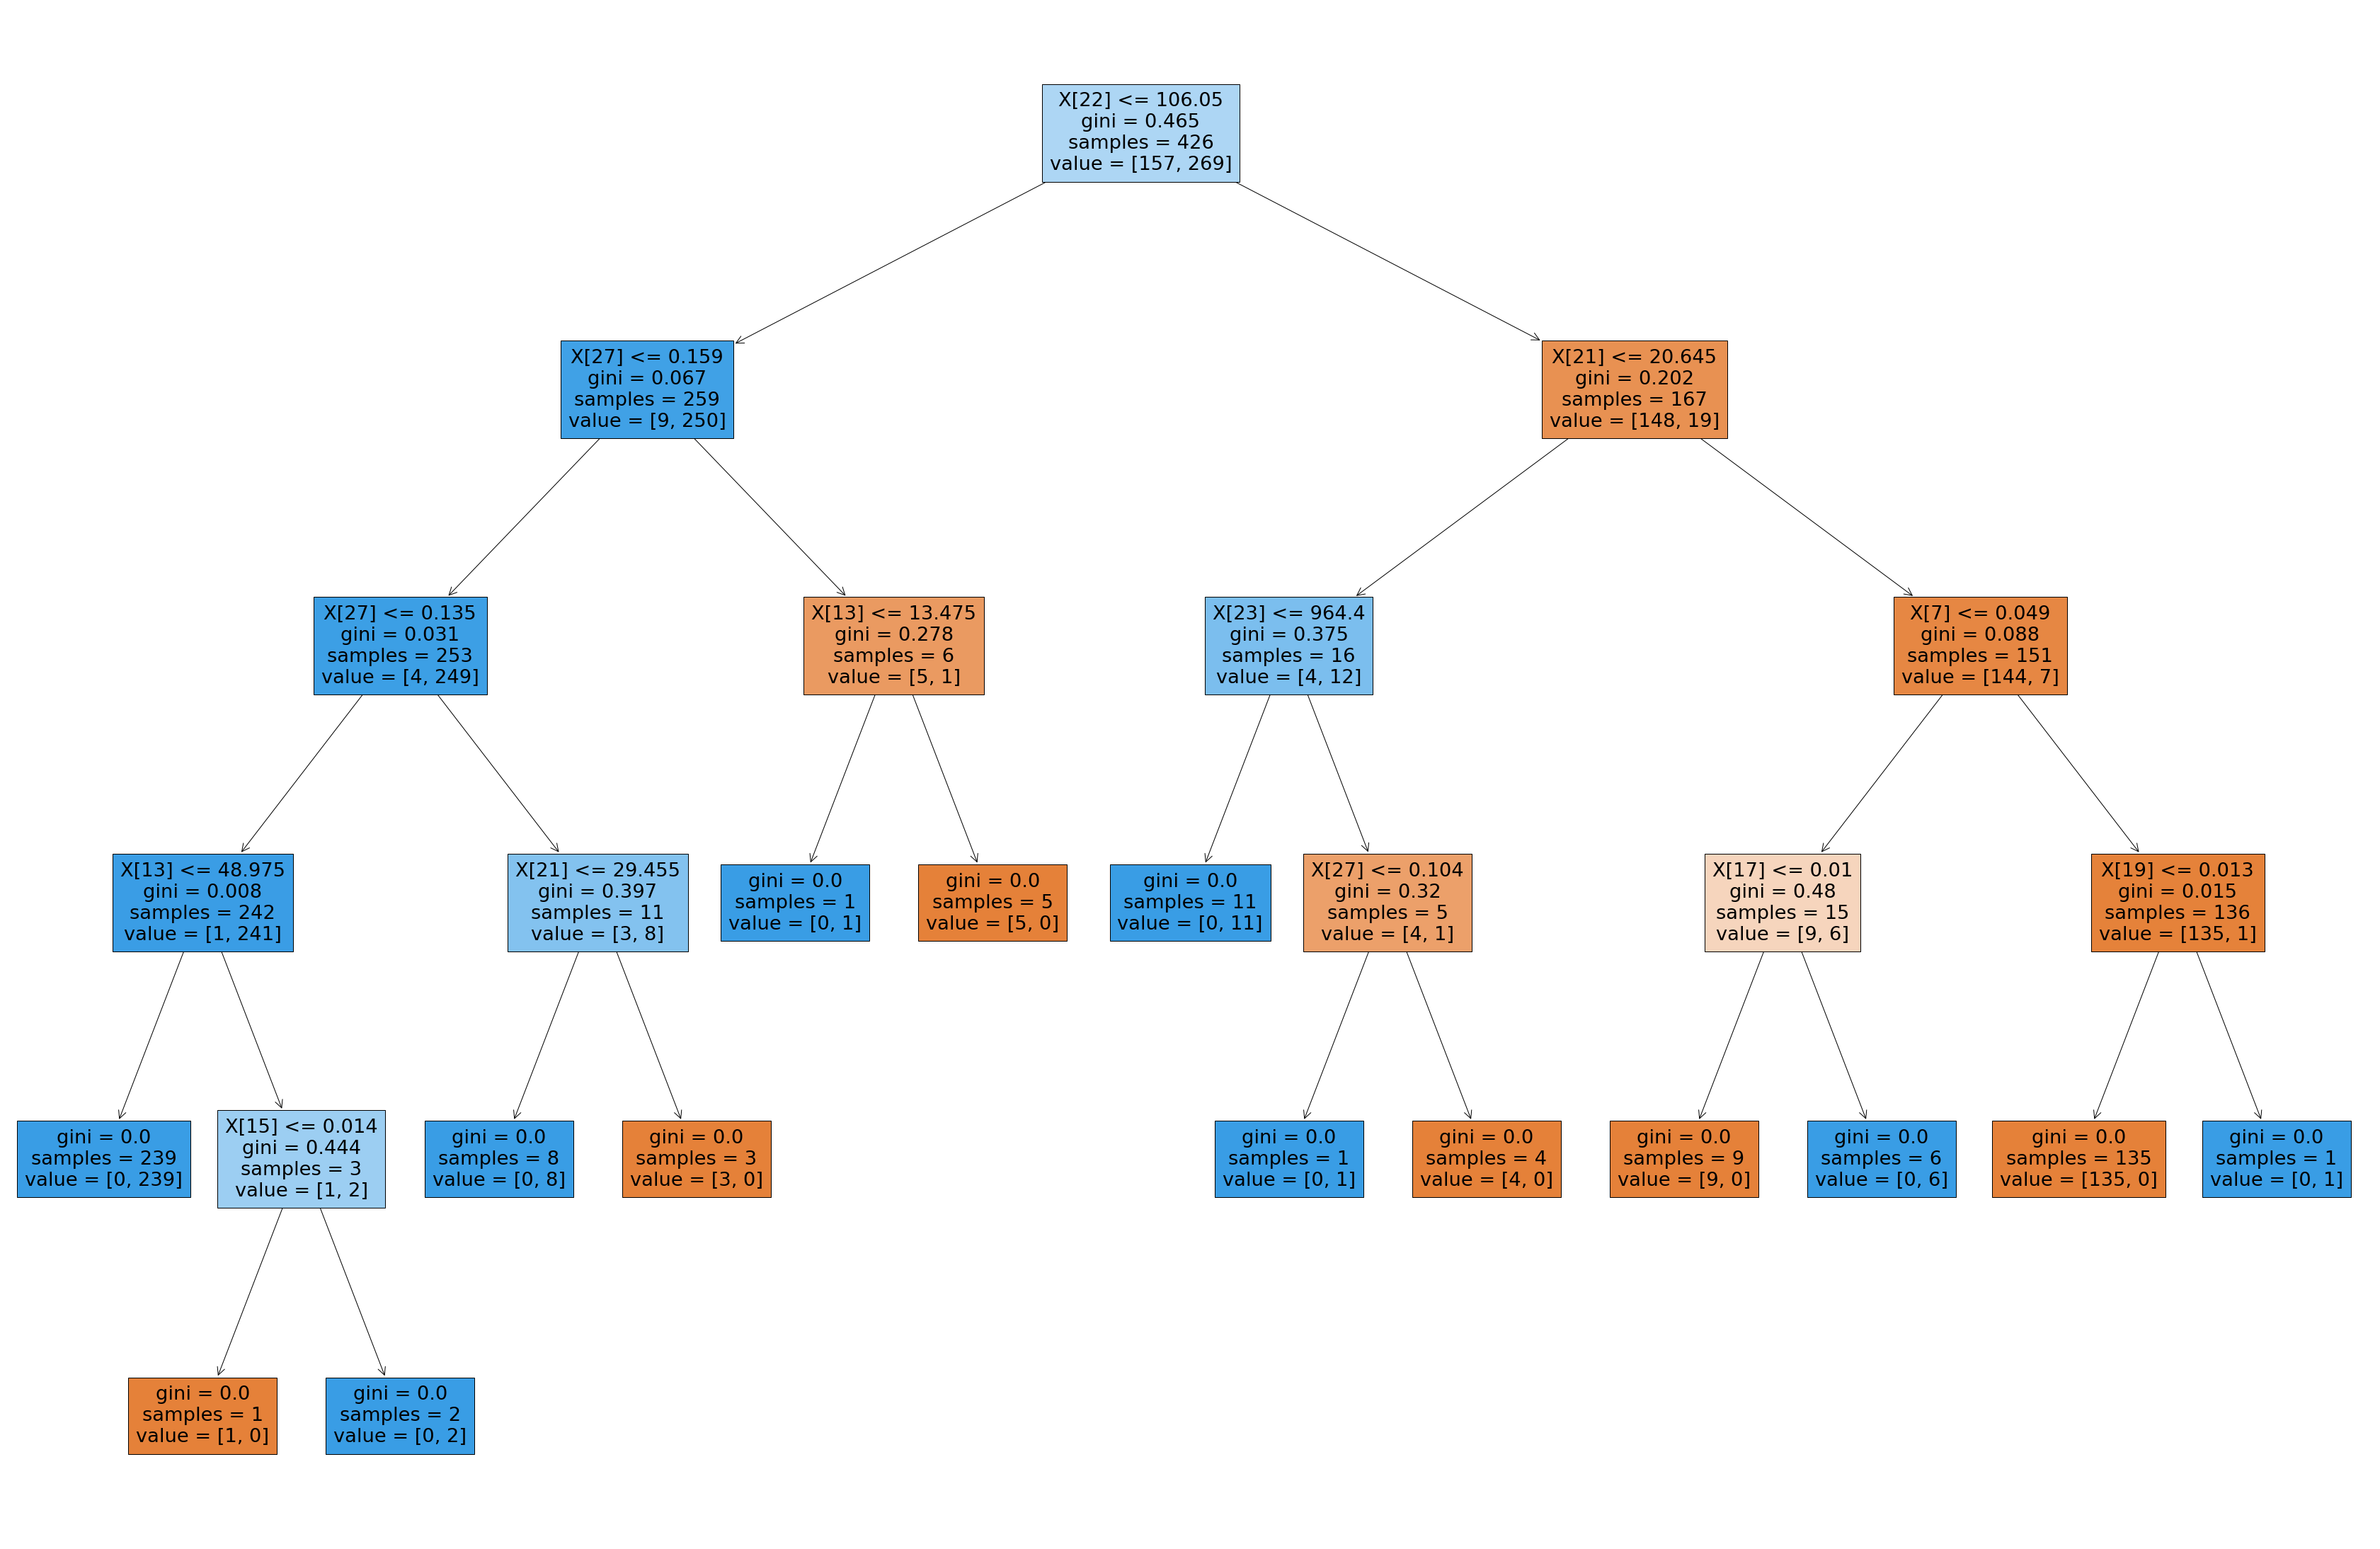

In [35]:
fig = plt.gcf()
fig.set_size_inches(60,40)
#plt.figure()
X = DecisionTreeClassifier(criterion = "gini").fit(X_train, Y_train)
plot_tree(X, filled=True)
plt.show()

#### looking at precision performance measures in the data

In [36]:
predicted_CART = decison_cancer_CART.predict(X_test)

In [37]:
# defining function for performance measures:
def confusion_mat(predicted,Y_test):
    ans = {'TP':0, 'TN':0, 'FP':0, 'FN':0}
    for i,j in zip(Y_test,predicted):
        if i == "NO" and j == "NO":
            ans['TN'] += 1
        elif i =="YES" and j == "YES":
            ans['TP'] += 1
        elif i == "NO" and j == 'YES':
            ans['FP'] += 1
        else:
            ans['FN'] += 1
    return ans

def Recall(ans):
    return (ans['TP'])/(ans['TP'] + ans['FN'])
def Precision(ans):
    return (ans['TP'])/(ans['TP'] + ans['FP'])
def accuracy(ans):
    return (ans['TP'] + ans['TN'])/(ans['TP'] + ans['TN'] + ans['FN'] + ans['FP'])
def F_measure(ans):
    return (2*Precision(ans)*Recall(ans))/(Precision(ans) + Recall(ans))
def misclassification_rate(ans):
    return (ans['FP'] + ans['FN'])/(ans['TP'] + ans['TN'] + ans['FN'] + ans['FP'])
def FPR(ans):
    return ans['FP']/(ans['FP'] + ans['TN'])
def G_measure(ans):
    return (2*Recall(ans)*(1-FPR(ans)))/(Recall(ans) + (1-FPR(ans)))

In [38]:
ans_CART = confusion_mat(predicted_CART,Y_test)

In [39]:
print('Recall:', Recall(ans_CART))
print('Precision:', Precision(ans_CART))
print('accuracy:', accuracy(ans_CART))
print('F-measure:', F_measure(ans_CART))
print('G-measure:', G_measure(ans_CART))

Recall: 0.9886363636363636
Precision: 0.9456521739130435
accuracy: 0.958041958041958
F-measure: 0.9666666666666666
G-measure: 0.9471965160587915


In [40]:
precision_score(Y_test, predicted_CART, average='weighted')
#print(recall_score(Y_test, predicted_CART, average='weighted'))

0.9590137058167749

The above are the values calculated for mesures of CART algorithm in decision trees!

## Now applying C4.5 algorithm to same dataset with same splitting :

In [22]:
d = load_breast_cancer()
df_ = pd.DataFrame(d.data, columns=d.feature_names)
y = d.target
y = ["NO" if i == 0 else "YES" for i in y ]
df_['Decision'] = y

In [23]:
from chefboost import Chefboost as chef
config = {'algorithm': 'C4.5'}
model_ = chef.fit(df_[:426], config) # since in CART we used first 426 values so here also 

C4.5  tree is going to be built...


C:\Users\shaur\anaconda3\lib\site-packages\chefboost\training\Preprocess.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = np.where(df[column_name] <= winner_threshold, "<="+str(winner_threshold), ">"+str(winner_threshold))


Accuracy:  99.53051643192488 % on  426  instances
finished in  56.01853680610657  seconds


Remember this algorithm deoends highly on size of dataset ....here the for small dataset it gives high accuracy but on test the data is different so it will give poor performance measures

#### Checking output on mean values of  input feature: 

In [24]:
random_data = np.array(df.describe().mean())
chef.predict(model_ , random_data)

'NO'

Hence, An accurate prdeiction was made on the given values, Therefore we have achieved our task of making a decision tree  
Now checking it's performance measurements:

In [25]:
a = df_[df_.columns[0:len(df_.columns)-1]]
prediction_C45 = []
# finding all the predicted values:
for i in range(426,569):
    prediction_C45.append(chef.predict(model_,a.iloc[i].to_numpy()))

In [26]:
len(prediction_C45)

143

In [27]:
actual = Y_test

In [28]:
len(actual)

143

In [29]:
ans_C45 = confusion_mat(prediction_C45,actual)
print('Recall:', Recall(ans_C45))
print('Precision:', Precision(ans_C45))
print('accuracy:', accuracy(ans_C45))
print('F-measure:', F_measure(ans_C45))
print('G-measure:', G_measure(ans_C45))

Recall: 0.7613636363636364
Precision: 0.6504854368932039
accuracy: 0.6013986013986014
F-measure: 0.7015706806282723
G-measure: 0.47526600709352246


## Finally Calculating predicitng the values on ID3 algorithm:

In [42]:
decison_cancer_ID3 = DecisionTreeClassifier(criterion = "entropy")
decison_cancer_ID3.fit(X_train, Y_train)
# checking the accuracy of the fit :
print('accuracy on test set :',decison_cancer_ID3.score(X_test, Y_test)) 

accuracy on test set : 0.9230769230769231


#### Checking output on mean values of  input feature: 

In [43]:
random_data = np.array(df.describe().mean())
X = random_data.reshape([1,random_data.shape[0]])
decison_cancer_ID3.predict(X, check_input=True)

array(['NO'], dtype=object)

Hence, An accurate prdeiction was made on the given values, Therefore we have achieved our task of making a decision tree
Below is the **prediction_probability** for above values

In [44]:
decison_cancer_ID3.predict_proba(X, check_input=True)

array([[1., 0.]])

Here the 1 value at index zero represents that output predicted is `NO`   
Now looking at the tree :

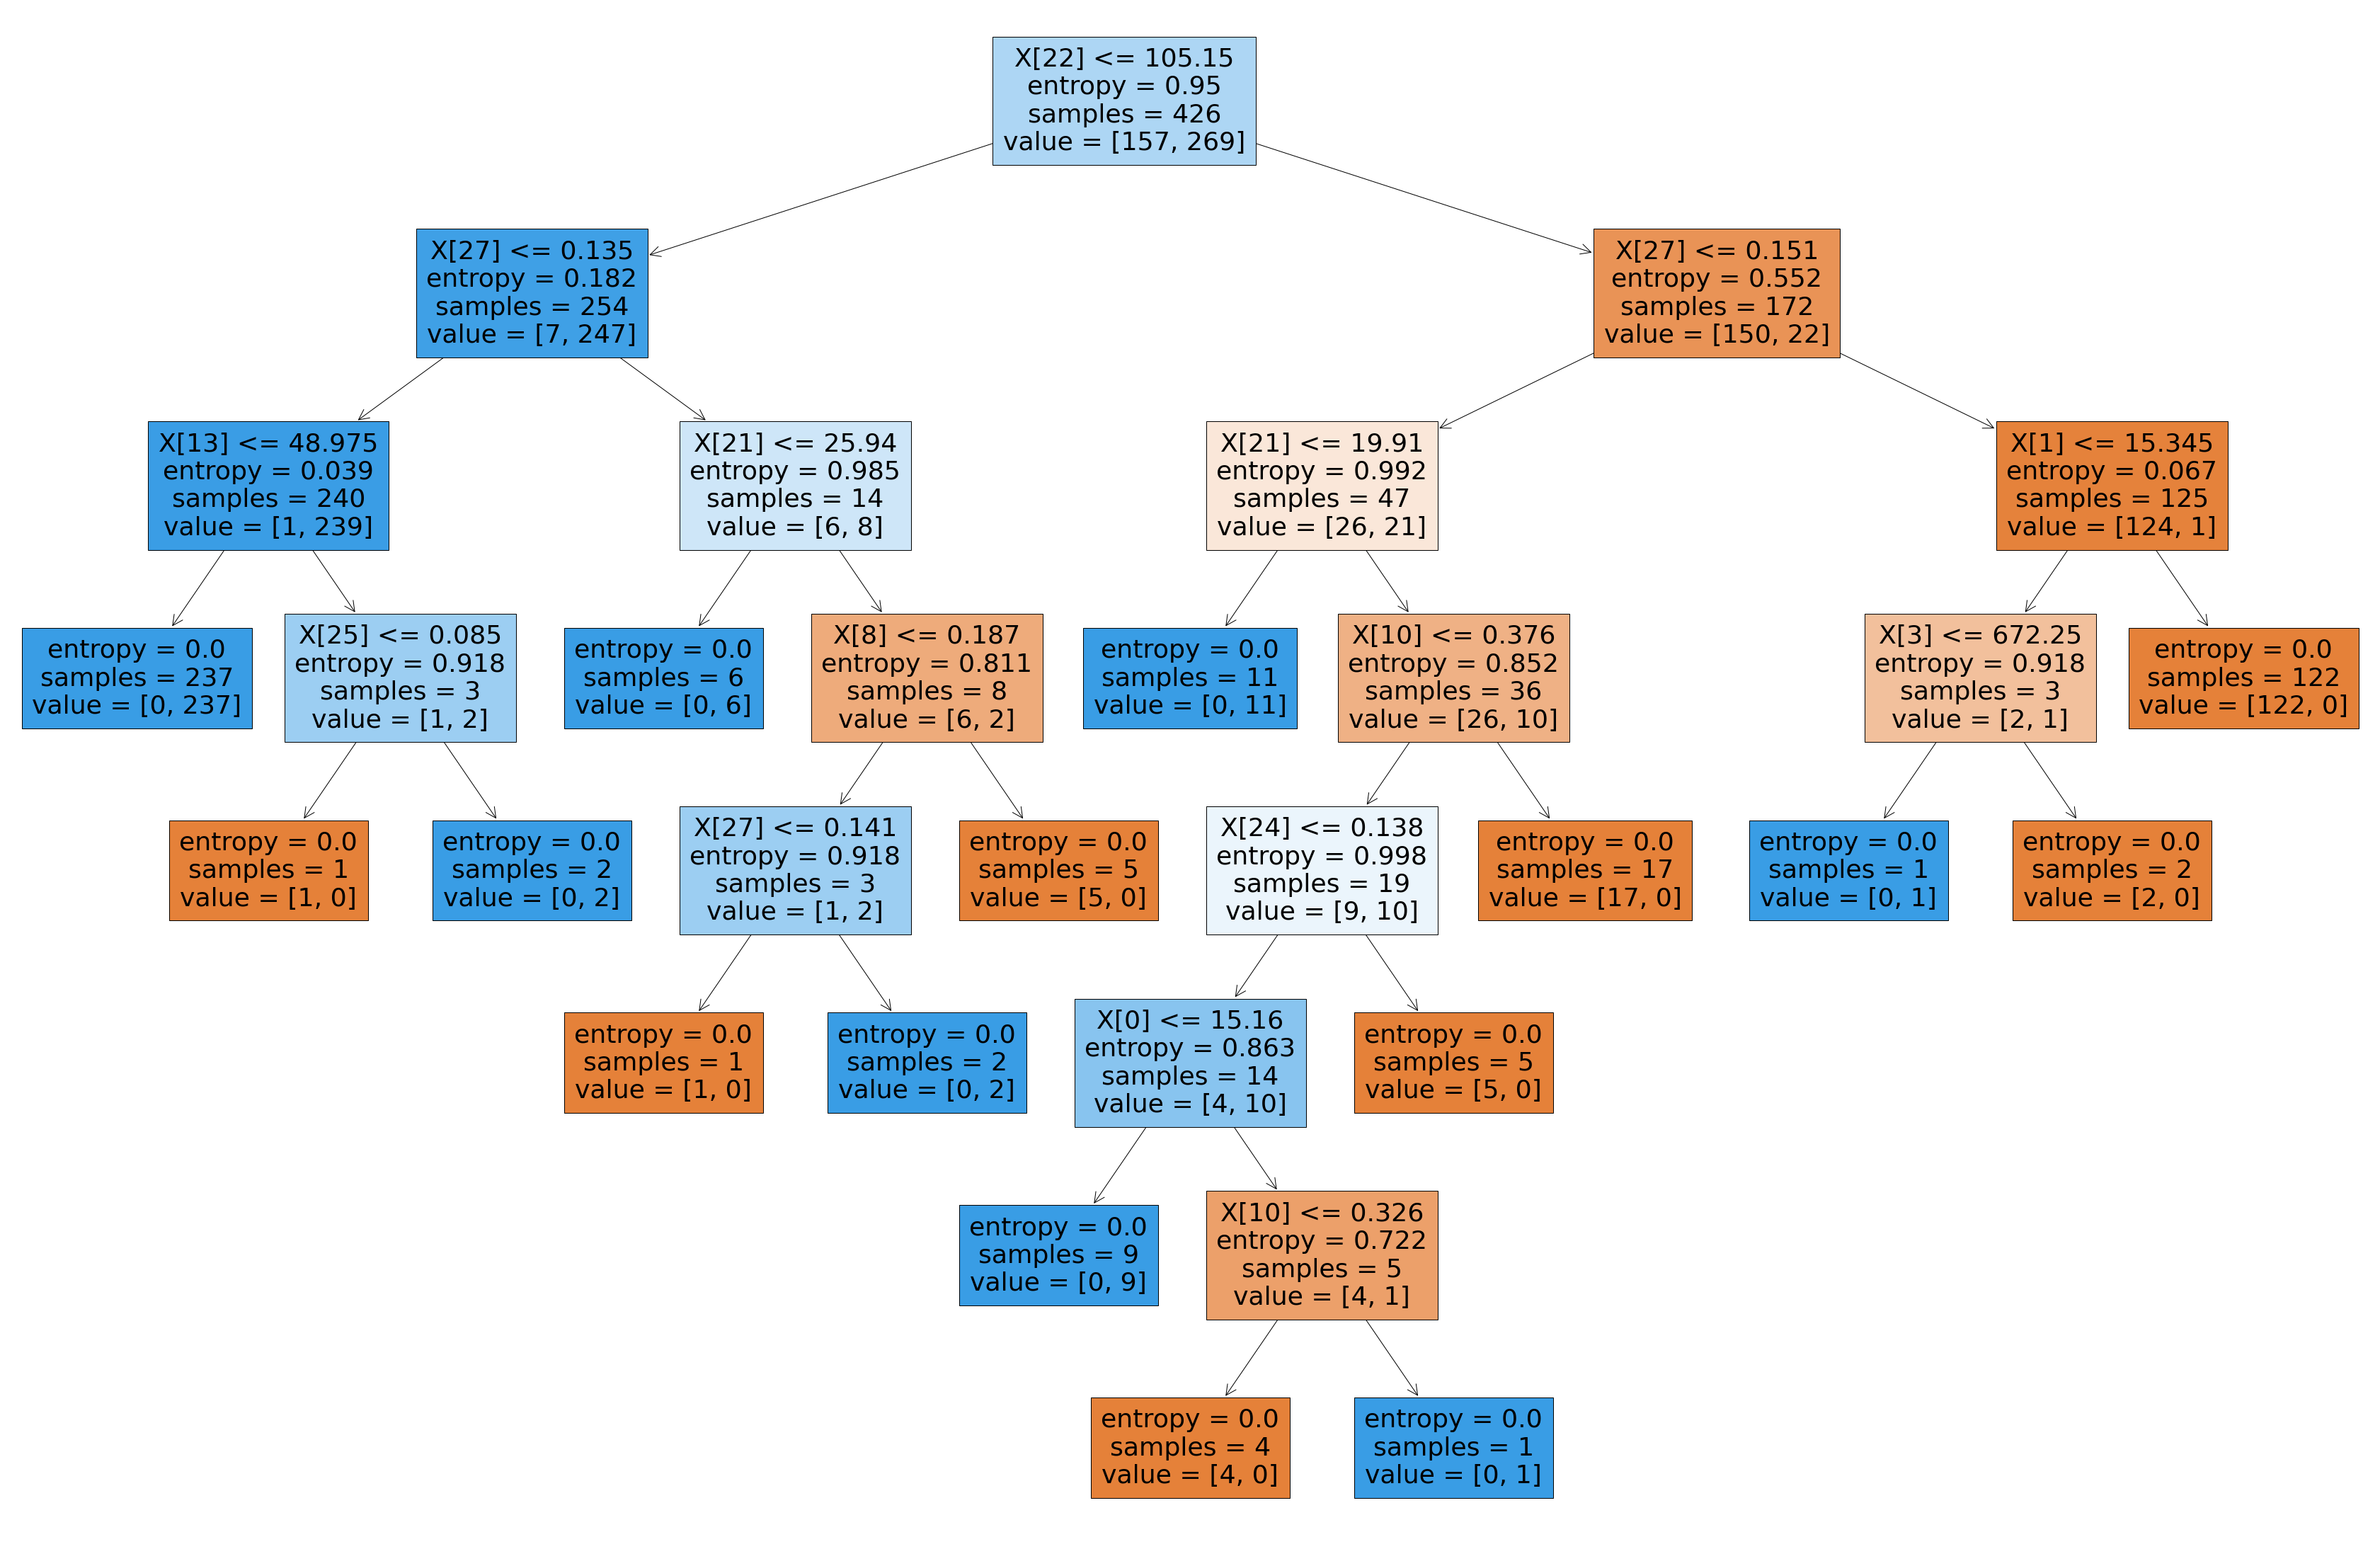

In [45]:
fig = plt.gcf()
fig.set_size_inches(60,40)
#plt.figure()
X = DecisionTreeClassifier(criterion = "entropy").fit(X_train, Y_train)
plot_tree(X, filled=True)
plt.show()

Clearly the above tree has less nodes compared to CART algorithm 

In [46]:
predicted_ID3 = decison_cancer_ID3.predict(X_test)

In [47]:
ans_ID = confusion_mat(predicted_ID3,Y_test)
print('Recall:', Recall(ans_ID))
print('Precision:', Precision(ans_ID))
print('accuracy:', accuracy(ans_ID))
print('F-measure:', F_measure(ans_ID))
print('G-measure:', G_measure(ans_ID))

Recall: 0.9659090909090909
Precision: 0.9139784946236559
accuracy: 0.9230769230769231
F-measure: 0.9392265193370166
G-measure: 0.9068210191805698


# Hence we made the classification of cancer dataset using 3 different Decision Tree algorithms : CART, C4.5 and ID3
comparing the performance measures of these datasets :

### CART

In [48]:
print("CART PERFORMANCE MEASURES:")
ans = confusion_mat(predicted_CART,Y_test)
print('Recall:', Recall(ans))
print('Precision:', Precision(ans))
print('accuracy:', accuracy(ans))
print('F-measure:', F_measure(ans))
print('G-measure:', G_measure(ans))

CART PERFORMANCE MEASURES:
Recall: 0.9886363636363636
Precision: 0.9456521739130435
accuracy: 0.958041958041958
F-measure: 0.9666666666666666
G-measure: 0.9471965160587915


### C4.5

In [49]:
print('C4.5 PERFORMANCE MEASURES:')
ans_C45 = confusion_mat(prediction_C45,actual)
print('Recall:', Recall(ans_C45))
print('Precision:', Precision(ans_C45))
print('accuracy:', accuracy(ans_C45))
print('F-measure:', F_measure(ans_C45))
print('G-measure:', G_measure(ans_C45))

C4.5 PERFORMANCE MEASURES:
Recall: 0.7613636363636364
Precision: 0.6504854368932039
accuracy: 0.6013986013986014
F-measure: 0.7015706806282723
G-measure: 0.47526600709352246


### ID3

In [50]:
print("ID3 PERFORMANCE MEASURES:")
ans_ID = confusion_mat(predicted_ID3,Y_test)
print('Recall:', Recall(ans_ID))
print('Precision:', Precision(ans_ID))
print('accuracy:', accuracy(ans_ID))
print('F-measure:', F_measure(ans_ID))
print('G-measure:', G_measure(ans_ID))

ID3 PERFORMANCE MEASURES:
Recall: 0.9659090909090909
Precision: 0.9139784946236559
accuracy: 0.9230769230769231
F-measure: 0.9392265193370166
G-measure: 0.9068210191805698


## From the above comparison we can rank the performance of these algorithms as :
### 1) CART
### 2) ID3
### 3) C4.5
Also we saw that ID3 requires more data for better prediction here only 426 values i.e. 75% of dataset wasn't enough for it to make good predicition on unseen data   
But all the algorithms made prediciton of `NO` in case of avg data values...Hence the algorithms worked made correct decisions overall.

In [52]:
Y_test

array(['YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES',
       'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO',
       'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO',
       'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES',
       'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO',
       'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO',
       'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'N